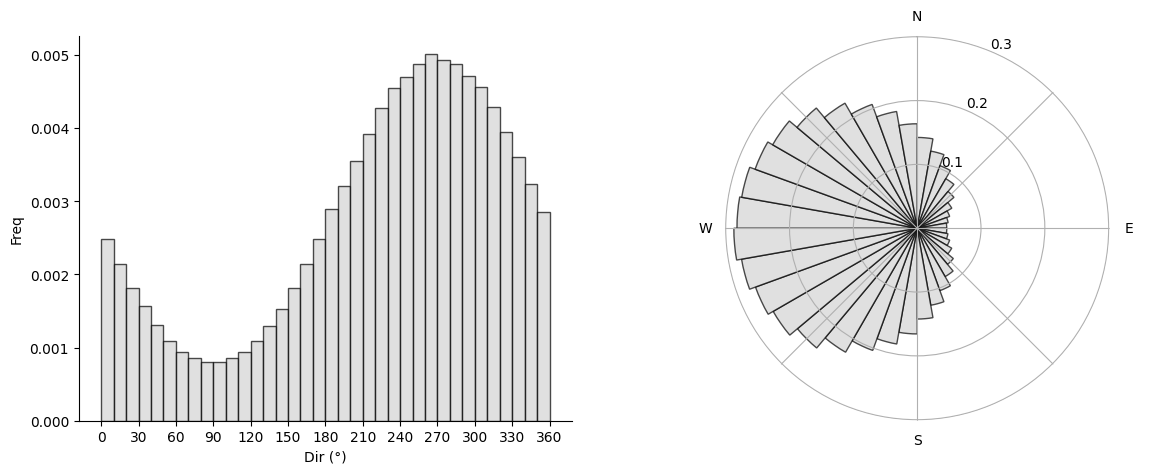

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the normal distribution
mean_direction = 270  # Mean at west (270°)
std_dev = 80          # Standard deviation in degrees
sample_size = 1000000 # Number of samples

# Generate the normal distribution
wind_directions = np.random.normal(loc=mean_direction, scale=std_dev, size=sample_size)
wind_directions = wind_directions % 360  # Wrap into [0, 360)

# Convert wind directions to radians
wind_directions_rad = np.deg2rad(wind_directions)

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 1 row, 2 columns

# First subplot: Cartesian histogram
axs[0].hist(wind_directions, bins=36, range=(0, 360), edgecolor='black', alpha=0.7, density=True, color='lightgrey')
axs[0].set_xlabel('Dir (°)')
axs[0].set_ylabel('Freq')
axs[0].set_xticks(range(0, 361, 30))
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Second subplot: Polar histogram
ax_polar = fig.add_subplot(1, 2, 2, polar=True)
counts, bins = np.histogram(wind_directions_rad, bins=36, range=(0, 2*np.pi), density=True)
ax_polar.bar((bins[:-1] + bins[1:]) / 2, counts, width=np.diff(bins), edgecolor='k', alpha=0.7, color='lightgrey')
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(-1)
ax_polar.set_xticks(np.linspace(0, 2*np.pi, 8, endpoint=False))
ax_polar.set_xticklabels(['N', '', 'E', '', 'S', '', 'W', ''])
ax_polar.spines['polar'].set_visible(False)
ax_polar.set_yticks([0.1, 0.2, 0.3])

for spine in axs[1].spines.values():
    spine.set_visible(False)

axs[1].set_axis_off()

# Layout adjustment
plt.show()


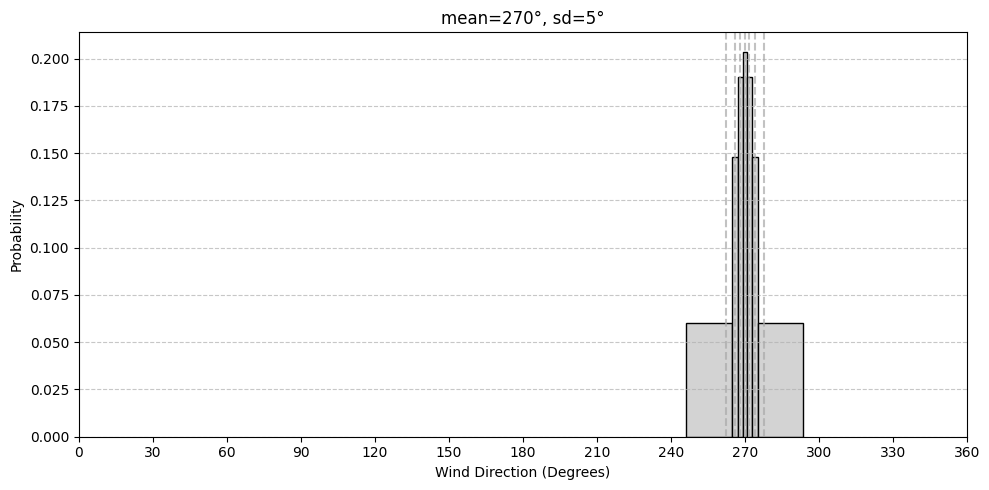

In [ ]:
# Generate wind direction distribution
from src.simulate_data import generate_wind_direction_distribution
wind_df = generate_wind_direction_distribution(mu=270, sd=5, wind_speed=8, turbulence_intensity=0.06, step=5,nquantile=7)